In [1]:
import numpy as np
import pandas as pd
import os
import regex as re
import operator
import matplotlib.pyplot as plt
from tabulate import tabulate, SEPARATING_LINE

In [2]:
# If you are using .venv
cwd = os.getcwd()
cwd = '/Users/rober/OneDrive/Education/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data'
print(cwd)

/Users/rober/OneDrive/Education/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data


In [3]:
# if you are using Docker
cwd = os.getcwd()
cwd = '/home/jovyan/work/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data'
print(cwd)

/home/jovyan/work/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data


In [4]:
path_demo = cwd + '/2. Demographics and Outcomes'
path_key = cwd + '/1. Network Data/Adjacency Matrix Keys'
path_adj = cwd + '/1. Network Data/Adjacency Matrices'
file1 =  'household_characteristics.dta'
file2 = 'individual_characteristics.dta'

In [5]:
path_demo

'/home/jovyan/work/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data/2. Demographics and Outcomes'

In [6]:
os.chdir(path_demo)

In [7]:
os.listdir(path='.')

['household_characteristics.dta', 'individual_characteristics.dta']

# Background

This project contains data from a survey of social networks in 75 villages in rural southern Karnataka, a state in India. A census of households was conducted, and a subset of individuals was asked detailed questions about the
relationships they had with others in the village. This information was used to create network graphs for each village, included here. Basic information for all households and all surveyed individuals is also provided.

https://economics.mit.edu/faculty/eduflo/social


Previously, these 75 villages had been identified by Bharatha Swamukti Samsthe (a microfinance institution) as places where it planned to start operations. Six months after the survey, BSS began expanding to these villages and in two years eventually spread to 43 of them. Information about which households participated in BSS's microfinance program was matched to the household census.

## Individual Characteristics

In [8]:
# read file of individuals rather than households
df2 = pd.io.stata.read_stata(file2)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16984 entries, 0 to 16983
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   village            16984 non-null  int8    
 1   adjmatrix_key      16984 non-null  int16   
 2   pid                16984 non-null  int32   
 3   hhid               16984 non-null  int32   
 4   resp_id            16984 non-null  int8    
 5   resp_gend          16984 non-null  int8    
 6   resp_status        16984 non-null  category
 7   age                16984 non-null  int8    
 8   religion           16983 non-null  category
 9   caste              16951 non-null  category
 10  subcaste           16984 non-null  object  
 11  mothertongue       16984 non-null  object  
 12  speakother         16984 non-null  category
 13  kannada            16984 non-null  category
 14  tamil              16984 non-null  category
 15  telugu             16984 non-null  category
 16  hind

## Subsetting only Village == 1

In [10]:
is_vill1 = df2['village'] == 1

In [11]:
subset_vilno_1 = df2[is_vill1]

In [12]:
subset_vilno_1.head()

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0.0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1.0,Yes,1.0,Yes,No,
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN


In [13]:
subset_vilno_1.shape

(203, 48)

In [14]:
subset_vilno_1.columns

Index(['village', 'adjmatrix_key', 'pid', 'hhid', 'resp_id', 'resp_gend',
       'resp_status', 'age', 'religion', 'caste', 'subcaste', 'mothertongue',
       'speakother', 'kannada', 'tamil', 'telugu', 'hindi', 'urdu', 'english',
       'otherlang', 'educ', 'villagenative', 'native_name', 'native_type',
       'native_taluk', 'native_district', 'res_time_yrs', 'res_time_mths',
       'movereason', 'movecontact', 'movecontact_res', 'movecontact_hhid',
       'movecontact_pid', 'movecontact_name', 'workflag', 'work_freq',
       'work_freq_type', 'occupation', 'privategovt', 'work_outside',
       'work_outside_freq', 'shgparticipate', 'shg_no', 'savings',
       'savings_no', 'electioncard', 'rationcard', 'rationcard_colour'],
      dtype='object')

## Data

The “Data” folder contains two subfolders: “Network Data” and “Demographics and Outcomes.” In the "Network Data" folder, there are adjacency matrices for each of the 75 villages surveyed. The 75 villages are numbered 1-77 (villages 13 and 22 are missing.) About half of households received detailed surveys in which individuals were asked to list the names of people with whom they shared a certain relationship. Households were randomly sampled and stratified by religion and geographic sub-region.


For each variable, an individual matrix and a household matrix were constructed. A relationship between households exists if any household members indicated a relationship with members from the other household. These questions were asked in the individual survey.

Individuals were asked who they:
- borrow money from
- give advice to
- help with a decision
- borrow kerosene or rice from
- lend kerosene or rice to
- lend money to
- obtain medical advice from
- engage socially with
- are related to
- go to temple with
- invite to one's home
- visit in another's home.

We also include the ALL network which is a union and an AND network which is the intersection. This is done both at the individual and household levels.

### Let's pick one example: adj_templecompany_vilno_1.csv AND relate to key_vilno_1.csv

For instance, using the file "adj_templecompany_vilno_1.csv," we discover that the individual in the fifth row goes to the same temple as the individual in the eigth row. Using "key_vilno_1.csv," we can determine that in the individual in the fifth row has an ID of 100201, and the individual in the eighth row has an ID of 100204. We can then look up demographic information about these individuals using the dataset in the "Demographics and Outcomes" folder by matching on the ID variable.

The **networks are undirected (each matrix is symmetric)**. Each row or column of a matrix represents one individual. The matrices lack row or column headers, but in the folder "adjacency matrix keys" there are files that link each row (or the equivalent column) to a particular individual or household

In [15]:
os.listdir(path=path_key)[:10]

['key_HH_vilno_1.csv',
 'key_HH_vilno_10.csv',
 'key_HH_vilno_11.csv',
 'key_HH_vilno_12.csv',
 'key_HH_vilno_14.csv',
 'key_HH_vilno_15.csv',
 'key_HH_vilno_16.csv',
 'key_HH_vilno_17.csv',
 'key_HH_vilno_18.csv',
 'key_HH_vilno_19.csv']

### To facilitate the recursion, let's organize the list, sorting only those with individual data and in ordinal.

In [16]:
key_vil = [f for f in sorted(os.listdir(path=path_key)) if 'HH' not in f]
key_vil = sorted(key_vil, key=lambda x: int(os.path.splitext(x.split('_')[2])[0]))

In [17]:
key_vil[:10]

['key_vilno_1.csv',
 'key_vilno_2.csv',
 'key_vilno_3.csv',
 'key_vilno_4.csv',
 'key_vilno_5.csv',
 'key_vilno_6.csv',
 'key_vilno_7.csv',
 'key_vilno_8.csv',
 'key_vilno_9.csv',
 'key_vilno_10.csv']

In [18]:
list(enumerate(key_vil))[:10]

[(0, 'key_vilno_1.csv'),
 (1, 'key_vilno_2.csv'),
 (2, 'key_vilno_3.csv'),
 (3, 'key_vilno_4.csv'),
 (4, 'key_vilno_5.csv'),
 (5, 'key_vilno_6.csv'),
 (6, 'key_vilno_7.csv'),
 (7, 'key_vilno_8.csv'),
 (8, 'key_vilno_9.csv'),
 (9, 'key_vilno_10.csv')]

### Let's understand key_vil files, picking village 1

In [19]:
os.chdir(path_key)
print(os.getcwd())

/home/jovyan/work/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data/1. Network Data/Adjacency Matrix Keys


In [20]:
key_vilno1 = pd.read_csv('key_vilno_1.csv',header=None)

In [21]:
key_vilno1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       843 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


Adding a column head to make it easier later on

In [22]:
key_vilno1.columns=['pid']

In [23]:
key_vilno1.head(9)

,pid
0,100101
1,100102
2,100103
3,100104
4,100201
5,100202
6,100203
7,100204
8,100205


In [24]:
key_vilno1.shape

(843, 1)

## Now let's understand the Adjacency Matrices for each village

In [25]:
os.chdir(path_adj)
print(os.getcwd())

/home/jovyan/work/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data/1. Network Data/Adjacency Matrices


### Again we filter and order the matrices

In [26]:
files_vilno_1 = [f for f in os.listdir(path=path_adj) if '_vilno_1.' in f and 'HH' not in f]

In [27]:
list(enumerate(files_vilno_1))

[(0, 'adj_allVillageRelationships_vilno_1.csv'),
 (1, 'adj_andRelationships_vilno_1.csv'),
 (2, 'adj_borrowmoney_vilno_1.csv'),
 (3, 'adj_giveadvice_vilno_1.csv'),
 (4, 'adj_helpdecision_vilno_1.csv'),
 (5, 'adj_keroricecome_vilno_1.csv'),
 (6, 'adj_keroricego_vilno_1.csv'),
 (7, 'adj_lendmoney_vilno_1.csv'),
 (8, 'adj_medic_vilno_1.csv'),
 (9, 'adj_nonrel_vilno_1.csv'),
 (10, 'adj_rel_vilno_1.csv'),
 (11, 'adj_templecompany_vilno_1.csv'),
 (12, 'adj_visitcome_vilno_1.csv'),
 (13, 'adj_visitgo_vilno_1.csv')]

In [28]:
sequencia = [(((list(enumerate(files_vilno_1))[i][0])),((list(enumerate(files_vilno_1))[i][1]).split('_')[1])) for i in range(14)]

#### A quick clean up, to select the text that will be added as an edge "atribute" or "relationship type"

### Let's merge the Key_vil with the adjency matrix

In [29]:
#df_vilno_1 = [pd.read_csv(file, header=None) for file in key_vil]

In [30]:
key_vilno1.head()

,pid
0,100101
1,100102
2,100103
3,100104
4,100201


In [31]:
key_vilno1.shape

(843, 1)

In [32]:
pd_vil1 = pd.merge(key_vilno1,subset_vilno_1,how='left',on='pid')

In [33]:
pd_vil1.loc[pd_vil1['village'] > 0]

,pid,village,adjmatrix_key,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
4,100201,1.0,5.0,1002.0,1.0,1.0,Head of Household,38.0,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0.0,No,NaN,No,NaN,Yes,Yes,GREEN
5,100202,1.0,6.0,1002.0,2.0,2.0,Spouse of Head of Household,27.0,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
22,100601,1.0,23.0,1006.0,1.0,1.0,Head of Household,29.0,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
23,100602,1.0,24.0,1006.0,2.0,2.0,Spouse of Head of Household,24.0,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1.0,Yes,1.0,Yes,No,
26,100701,1.0,27.0,1007.0,1.0,1.0,Head of Household,58.0,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,117202,1.0,791.0,1172.0,2.0,2.0,Spouse of Head of Household,62.0,HINDUISM,OBC,...,IN LAND LORD,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
791,117203,1.0,792.0,1172.0,3.0,2.0,Other,30.0,HINDUISM,OBC,...,LAND LORD,No,NaN,No,NaN,No,NaN,Yes,Yes,YELLOW
794,117301,1.0,795.0,1173.0,1.0,1.0,Head of Household,75.0,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,APL
801,117403,1.0,802.0,1174.0,3.0,2.0,Other,26.0,HINDUISM,SCHEDULED CASTE,...,PRIVATE BUSINESS,No,NaN,No,NaN,No,NaN,No,No,


#### As stated, there are no demographic data for all people, only a subset.

# Creating the Graph in neo4j

We are using the python-neo4j official driver API.

## Attention if this notebook is run inside a Docker Container

**Notes (23/11/2020)**. This notebook in run inside a docker container. In docker-compose.yml, set network to "host", so the container use the host network and below it can access the localhost:7687 if the Host.
Authentication cchanged from None to auth=("neo4j", "password")

In [34]:
from neo4j import GraphDatabase

In [35]:
uri = "neo4j://localhost:7687"
user = "neo4j"
password = '12345678'
AUTH = (user, password)
driver = GraphDatabase.driver(uri, auth=AUTH)

In [1]:
with driver:
    driver.verify_connectivity()
session = driver.session()

In [ ]:
session    

In [ ]:
session._connection

### Let's create some basic methods

In [ ]:
def count_nodes(tx):
    result = tx.run("MATCH (n) RETURN count(n)")
    record = result.single()
    return record[0]    

In [ ]:
#session.read_transaction(count_nodes)

In [ ]:
#session.closed()

In [ ]:
#session.has_transaction()

In [ ]:
key_vilno1.head(5),key_vilno1.tail(5)

In [ ]:
#Let's transform each of the adjacency files (csv) to panda dataframes
files_vilno_1 = [f for f in os.listdir(path=path_adj) if '_vilno_1.' in f and 'HH' not in f]

In [ ]:
df_vilno_1 = [pd.read_csv(file, header=None) for file in files_vilno_1]

In [ ]:
df_vilno_1[7].head(6)

In [ ]:
sequencia[0:15]

In [ ]:
(m,n) = df_vilno_1[11].shape
(m,n)

In [ ]:
def create_person(driver, pid):
    with driver.session() as session:
        tx = session.begin_transaction()
        id = tx.run("CREATE (a:Person{pid:$pid}) RETURN id(a)", pid=pid).single().value()
        tx.commit()
        return id

In [ ]:
def get_person_id(driver,pid):
    with driver.session() as session:
        tx = session.begin_transaction()
        try:
            id = tx.run("MATCH (a:Person{pid:$pid})"
                      "RETURN id(a)", pid=pid).single().value()
            #tx.commit()
            return id
        except:
            return create_person(driver,pid)

In [ ]:
def create_rel(driver, pid1, pid2, typo):
    with driver.session() as session:
        tx = session.begin_transaction()
        id1 = get_person_id(driver,pid1)
        id2 = get_person_id(driver,pid2)
        stmt1 = "MATCH (a) WHERE id(a)=$id1 ""MATCH (b) WHERE id(b)=$id2"
        stmt2 = "MERGE (a)-[r:{}]->(b) RETURN a,r,b".format(typo)                
        tx.run(stmt1+' '+ stmt2, id1=id1, id2=id2)
        tx.commit()

In [ ]:
def create_graph(num, tema, m, n):
    for i in range(m):
        for j in range(m-i):
            if (df_vilno_1[num][i][j+i] == 1):
                pid1 = int(key_vilno1['pid'][i])
                pid2 = int(key_vilno1['pid'][j+i])
                #print(pid1, pid2, df_vilno_1[num][i][j+i])
                create_rel(driver, pid1, pid2, tema)

In [ ]:
sequencia[0:15]

In [ ]:
def make_neo4j_graph():
    for item in sequencia[0:1]:
        num = item[0]
        tema = item[1]
        (m,n) = df_vilno_1[num].shape
        print(num, m, n, tema)
        create_graph(num, tema, m, n)
    

In [ ]:
make_neo4j_graph()

In [ ]:
for i in range(m):
    for j in range(n):
        if (df_vilno_1[7][i][j] == 1):
            pid1 = int(key_vilno1['pid'][i])
            pid2 = int(key_vilno1['pid'][j])
            #create_rel(driver, pid1, pid2, 'lendmoney')

In [ ]:
df_vilno_1[11][0][3], df_vilno_1[11][3][0]

In [ ]:
type(int(key_vilno1['pid'][0]))

In [ ]:
create_person(driver, 100460)

In [ ]:
create_person(driver, 100750)

In [ ]:
create_rel(driver, 100700,100900,"borrowfrom")

In [ ]:
get_person_id(driver,100900)

# Let's Build a Multigraph using Networkx

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [35]:
G = nx.MultiGraph()

In [36]:
#Let's transform each of the adjacency files (csv) to panda dataframes
files_vilno_1 = [f for f in os.listdir(path=path_adj) if '_vilno_1.' in f and 'HH' not in f]

In [37]:
df_vilno_1 = [pd.read_csv(file, header=None) for file in files_vilno_1]

In [38]:
df_vilno_1[7].head(6)

,0,1,2,3,4,5,6,7,8,9,...,833,834,835,836,837,838,839,840,841,842
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
sequencia = [(((list(enumerate(files_vilno_1))[i][0])),((list(enumerate(files_vilno_1))[i][1]).split('_')[1])) for i in range(14)]

In [40]:
# Relationships will be created sequencially, by "tema"

In [41]:
sequencia[0:13]

[(0, 'allVillageRelationships'),
 (1, 'andRelationships'),
 (2, 'borrowmoney'),
 (3, 'giveadvice'),
 (4, 'helpdecision'),
 (5, 'keroricecome'),
 (6, 'keroricego'),
 (7, 'lendmoney'),
 (8, 'medic'),
 (9, 'nonrel'),
 (10, 'rel'),
 (11, 'templecompany'),
 (12, 'visitcome')]

In [43]:
# Loop for creating the graph, not repeating as the adjacent matrix is simetric
# However we assume direction line -> to columm, first comes first
def create_graph(G, num, tema, m, n):
    for i in range(m):
        for j in range(m-i):
            if (df_vilno_1[num][i][j+i] == 1):
                pid1 = int(key_vilno1['pid'][i])
                pid2 = int(key_vilno1['pid'][j+i])
                #print(pid1, pid2, df_vilno_1[num][i][j+i])
                G.add_edge(pid1, pid2, type=tema )

In [44]:
G.clear()
G = nx.MultiGraph()
for item in sequencia[0:14]:
    num = item[0]
    tema = item[1]
    (m,n) = df_vilno_1[num].shape    
    print(num, m, n, tema)
    create_graph(G, num, tema, m, n)

0 843 843 allVillageRelationships
1 843 843 andRelationships
2 843 843 borrowmoney
3 843 843 giveadvice
4 843 843 helpdecision
5 843 843 keroricecome
6 843 843 keroricego
7 843 843 lendmoney
8 843 843 medic
9 843 843 nonrel
10 843 843 rel
11 843 843 templecompany
12 843 843 visitcome
13 843 843 visitgo


In [44]:
#G.edges(data=True)

### Direction points to whom a given individual lend money to

In [45]:
def subgraph_by_property(multiGraph=G, property='lendmoney'):
    selected_edges = [(u,v) for u,v,e in multiGraph.edges(data=True) if e['type'] == property]
    H = nx.Graph()
    #H = nx.Graph()
    H.add_edges_from(selected_edges)
    return H    

Build a subgraph H

In [46]:
H = subgraph_by_property(multiGraph=G, property='lendmoney')

In [47]:
H.number_of_nodes(), H.number_of_edges()

(838, 2125)

In [48]:
def vizu(G):
    spring_pos = nx.spring_layout(G)
    plt.figure(figsize=(10,7))
    plt.axis("off")
    nx.draw_networkx(G,pos = spring_pos, with_labels = False, node_size=35, node_color='#1f78b4')

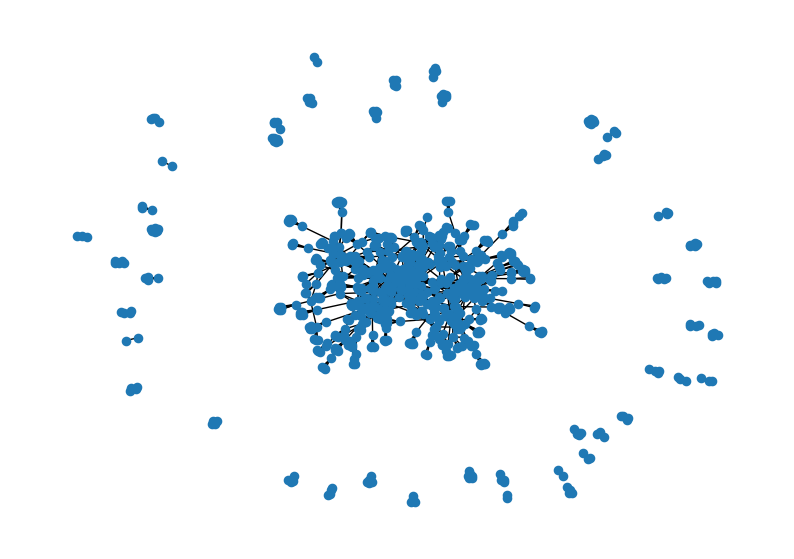

In [49]:
vizu(H)

### Some Properties

In [51]:
# In Degree: people who are mostly trustworthy to receive money from lenders
my_list = list(H.degree())
my_list.sort(key = operator.itemgetter(1), reverse=True)
print(my_list[:20])

[(116308, 15), (108905, 15), (116303, 14), (116307, 14), (116310, 14), (116304, 13), (116311, 13), (101201, 13), (107307, 13), (107308, 13), (108906, 12), (111901, 12), (107302, 12), (107303, 12), (107304, 12), (116301, 11), (116302, 11), (116305, 11), (116306, 11), (116309, 11)]


In [52]:
# Amostra de idades de quem recebe 
sample_in = [pd_vil1.loc[pd_vil1['pid'] == item[0]].age.item() for item in my_list[:20]]
print(sample_in)

[30.0, 35.0, 38.0, 35.0, 30.0, 28.0, 26.0, nan, 42.0, 31.0, 26.0, 57.0, 68.0, 50.0, 40.0, 60.0, 55.0, nan, nan, nan]


In [52]:
#plt.hist(sample_in, bins=20)

In [53]:
# Number of connected components
nx.number_connected_components(H)

45

In [56]:
#plt.hist(sample_in, bins=20)

## Quantifying the structure of the network

- Degree Distribution
- Path Length
- Clustering coefficient
- Connected Components

In [57]:
def degree_scatter(H):
    degree_sequence = [d for n, d in H.degree()]
    
    dist = {}
    for d in degree_sequence:
        if d in dist:
            dist[d] += 1
        else:
            dist[d] = 1
    x = []
    y = []
    for d in dist:
        if d>0:
            x.append(d)
            y.append(dist[d])
    return x,y
    

In [58]:
def plot_degree_scatter(x,y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # First subplot: simple scatter plot
    ax1.scatter(x, y)
    ax1.set_title('Simple Scatter Plot')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    # Second subplot: scatter plot with log-scaled axes
    ax2.scatter(x, y)
    ax2.set_title('Scatter Plot with Log-scaled Axes')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel('log(x)')
    ax2.set_ylabel('log(y)')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()
    
def plot_scatter(x,y, title='Simple Scatter Plot'):
    # simple scatter plot
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

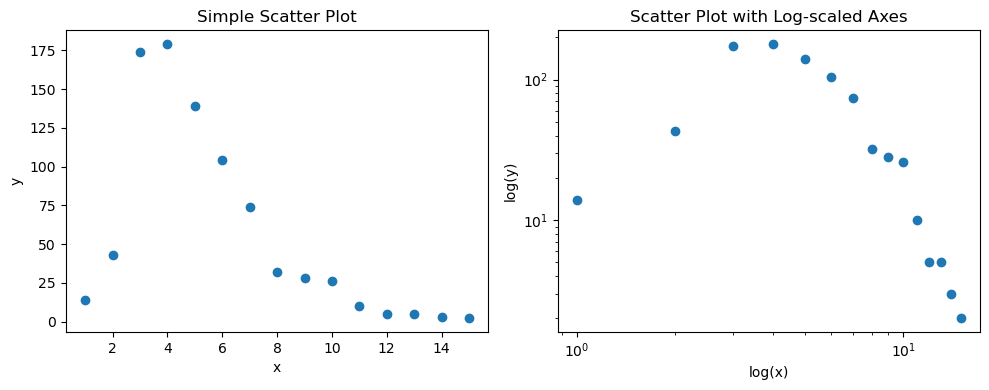

In [59]:
x, y = degree_scatter(H)
plot_degree_scatter(x, y)

## Diameter and Average Path Length

In [61]:
# Number of connected components
nx.connected_components(H)

<generator object connected_components at 0x7fbcba29b6f0>

In [62]:
Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
G0 = H.subgraph(Gcc[0])

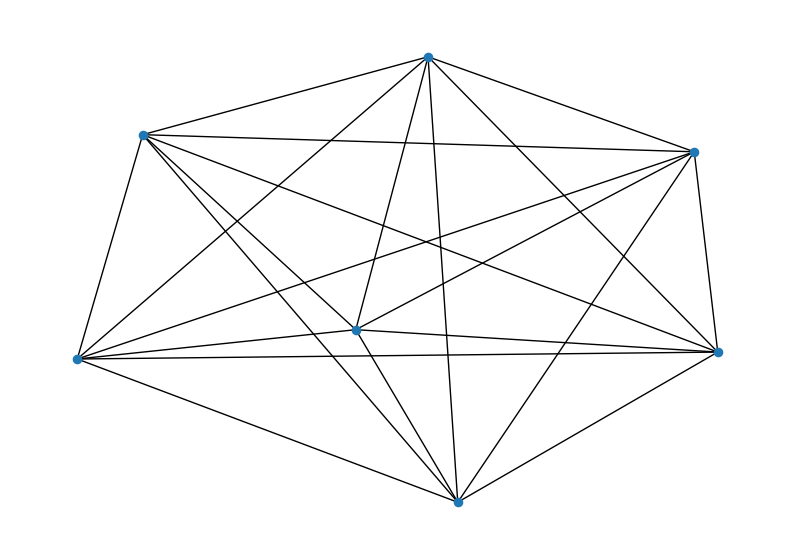

In [63]:
vizu(H.subgraph(Gcc[2]))

### Shortest Paths

In [64]:
nx.diameter(G0)

18

In [66]:
nx.average_shortest_path_length(G0)

7.1396378043469095

In [67]:
length = dict(nx.all_pairs_shortest_path_length(G0))

In [68]:
dist = {}
nodes = list(length.keys())

for node in nodes:
    sequence = [x for x in list(length[node].values()) if x>0]
    for d in sequence:
        if d in dist:
            dist[d] += 1
        else:
            dist[d] = 1
x = []
y = []
for d in dist:
    if d>0:
        x.append(d)
        y.append(dist[d])
x,y

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [3576,
  5136,
  15336,
  27556,
  48606,
  65538,
  75262,
  70684,
  53164,
  33172,
  16610,
  7180,
  3124,
  1348,
  524,
  186,
  42,
  18])

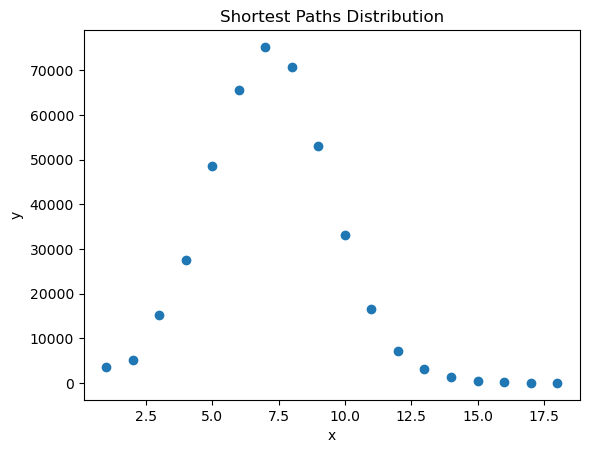

In [69]:
plot_scatter(x, y, 'Shortest Paths Distribution')

In [70]:
result = [a * b for a, b in zip(x, y)]
print(sum(result)/sum(y))

7.1396378043469095


### Clustering

In [71]:
nx.average_clustering(G0)

0.7756197506197511

<img src='clustering_coeff.png' style='width: 40%'></img>

In the middle case:

$k_i$ = 4 (4 friends) <br>
$e_i$ = 3  (number of connections between friends) <br>
Max possible number of connections = 6 <br>
$C_i = \dfrac{2e_i}{k_i(k_i-1)} = \dfrac{2*3}{4*3} = \dfrac{6}{12} = \dfrac{1}{2}$ <br>

In [72]:
clust = {}
nodes = list(nx.clustering(G0.to_undirected()).values())


for d in nodes:
    if d in clust:
        clust[d] += 1
    else:
        clust[d] = 1
x = []
y = []
for d in clust:
    if d>0:
        x.append(d)
        y.append(clust[d])

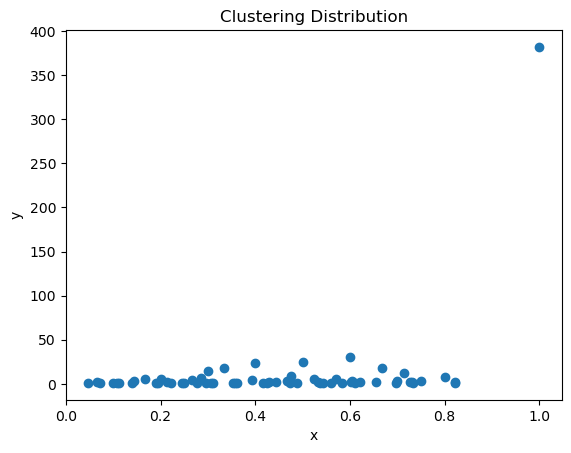

In [73]:
plot_scatter(x, y, 'Clustering Distribution')

In [74]:
result = [a * b for a, b in zip(x, y)]
print(sum(result)/sum(y))

0.7852249487698403


It is a small world with bunch of highly connected groups (most likely members of same household/family)

### Direction points to whom a given individual borrow money from

In [75]:
H = subgraph_by_property(multiGraph=G, property='borrowmoney')

In [76]:
H.number_of_nodes(), H.number_of_edges()

(838, 2149)

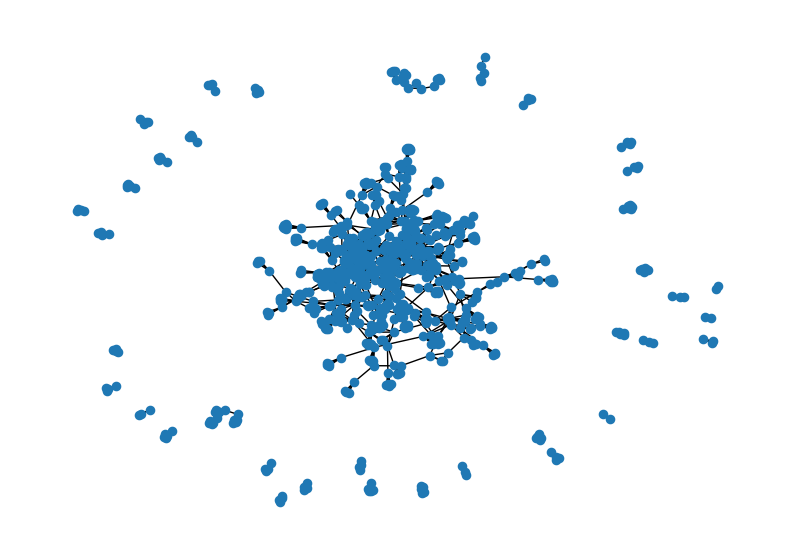

In [77]:
vizu(H)

In [78]:
# In Degree: people who are mostly trustworthy to LEND
my_list = list(H.degree())
my_list.sort(key = operator.itemgetter(1), reverse=True)
print(my_list[:20])

[(117301, 19), (116307, 15), (116308, 14), (116304, 13), (116310, 13), (116311, 13), (108905, 13), (108901, 13), (107308, 13), (116301, 12), (116303, 12), (115802, 12), (108906, 12), (107307, 12), (115808, 12), (104801, 11), (116302, 11), (116305, 11), (116306, 11), (116309, 11)]


In [79]:
# Amostra de idades de quem recebe 
sample_in = [pd_vil1.loc[pd_vil1['pid'] == item[0]].age.item() for item in my_list[:20]]
print(sample_in)

[75.0, 35.0, 30.0, 28.0, 30.0, 26.0, 35.0, 45.0, 31.0, 60.0, 38.0, 44.0, 26.0, 42.0, 35.0, 60.0, 55.0, nan, nan, nan]


# Analysis of All relationships

In [80]:
keys = [x[1] for x in sequencia]
overall = {}
for key in keys:
    overall[key]=subgraph_by_property(multiGraph=G, property=key)

In [81]:
overall

{'allVillageRelationships': <networkx.classes.graph.Graph at 0x7fbcb894a9e0>,
 'andRelationships': <networkx.classes.graph.Graph at 0x7fbcb894a350>,
 'borrowmoney': <networkx.classes.graph.Graph at 0x7fbcb894bee0>,
 'giveadvice': <networkx.classes.graph.Graph at 0x7fbcb894a800>,
 'helpdecision': <networkx.classes.graph.Graph at 0x7fbcba23cee0>,
 'keroricecome': <networkx.classes.graph.Graph at 0x7fbcba23c910>,
 'keroricego': <networkx.classes.graph.Graph at 0x7fbcba23dcc0>,
 'lendmoney': <networkx.classes.graph.Graph at 0x7fbcba23ef20>,
 'medic': <networkx.classes.graph.Graph at 0x7fbcba23d000>,
 'nonrel': <networkx.classes.graph.Graph at 0x7fbcba23d1b0>,
 'rel': <networkx.classes.graph.Graph at 0x7fbcba23f070>,
 'templecompany': <networkx.classes.graph.Graph at 0x7fbcba23d990>,
 'visitcome': <networkx.classes.graph.Graph at 0x7fbcba23ef80>,
 'visitgo': <networkx.classes.graph.Graph at 0x7fbcba2da2c0>}

In [82]:
for i, key in enumerate(list(overall.keys())):
    print(i, key)

0 allVillageRelationships
1 andRelationships
2 borrowmoney
3 giveadvice
4 helpdecision
5 keroricecome
6 keroricego
7 lendmoney
8 medic
9 nonrel
10 rel
11 templecompany
12 visitcome
13 visitgo


In [83]:
len([sorted(nx.connected_components(overall[key].to_undirected()), key=len, reverse=True) for key in keys])

14

In [84]:
nodes = [overall[key].number_of_nodes() for key in keys]
edges = [overall[key].number_of_edges() for key in keys]
connected_components = [sorted(nx.connected_components(overall[key]), key=len, reverse=True) for key in keys]
no_connected = [len(con) for con in connected_components]


clust = []
shrt_path = []
diam = []

# Now pick the largest connected component
for i, key in enumerate(list(overall.keys())):
    connec_components = sorted(nx.connected_components(overall[key]), key=len, reverse=True)
    G0 = overall[key].subgraph(connec_components[0])
    clust.append(nx.average_clustering(G0))
    shrt_path.append(nx.average_shortest_path_length(G0))
    diam.append(nx.diameter(G0))  

nodes.insert(0,'nodes')
edges.insert(0,'edges')
no_connected.insert(0,'conn_comp ')
clust.insert(0,'clust')
shrt_path.insert(0,'shrt_path')
diam.insert(0,'diam')

table=[nodes,edges, no_connected, SEPARATING_LINE, diam, shrt_path, clust]
print(tabulate(table,headers=['Village 1'] + keys, floatfmt=".2f"))

Village 1      allVillageRelationships    andRelationships    borrowmoney    giveadvice    helpdecision    keroricecome    keroricego    lendmoney    medic    nonrel      rel    templecompany    visitcome    visitgo
-----------  -------------------------  ------------------  -------------  ------------  --------------  --------------  ------------  -----------  -------  --------  -------  ---------------  -----------  ---------
nodes                           841.00              834.00         838.00        838.00          837.00          836.00        837.00       838.00   836.00    838.00   838.00           835.00       837.00     837.00
edges                          3405.00             1849.00        2149.00       2010.00         2067.00         2219.00       2213.00      2125.00  2045.00   2296.00  2288.00          1872.00      2216.00    2252.00
conn_comp                         6.00              173.00          40.00         65.00           64.00           41.00         40.00   

In [85]:
# Looks like it cluster members of household
(nx.community.louvain_communities(overall['lendmoney']))[:5]

[{100101, 100102, 100103, 100104},
 {102901,
  102902,
  102903,
  103101,
  103102,
  103103,
  103104,
  103105,
  103106,
  103201,
  103202,
  103203,
  103204,
  103205,
  103301,
  103302,
  103303,
  103304,
  103305,
  103401,
  103402,
  103403,
  103404,
  103501,
  103502,
  103503,
  103504,
  103701,
  103702,
  103703,
  103704,
  103705,
  103901,
  111301,
  111302},
 {100601,
  100602,
  100603,
  100604,
  101901,
  101902,
  101903,
  101904,
  101905,
  102001,
  102002,
  102003,
  102004,
  102601,
  102602,
  102603,
  102604,
  104401,
  104402,
  104403,
  104404,
  104405},
 {104101,
  104102,
  104103,
  104104,
  104201,
  104202,
  104203,
  104204,
  104205,
  104206,
  104207,
  104301,
  104302,
  104303},
 {100301, 100302, 100303, 100304}]

In [93]:
H = subgraph_by_property(multiGraph=G, property='lendmoney')
# In Degree: people who are mostly trustworthy to receive money from lenders
my_list = list(H.degree())
my_list.sort(key = operator.itemgetter(1), reverse=True)
print(my_list[:20])

[(116308, 15), (108905, 15), (116303, 14), (116307, 14), (116310, 14), (116304, 13), (116311, 13), (101201, 13), (107307, 13), (107308, 13), (108906, 12), (111901, 12), (107302, 12), (107303, 12), (107304, 12), (116301, 11), (116302, 11), (116305, 11), (116306, 11), (116309, 11)]


In [92]:
list(nx.neighbors(H, 116308))

[116301,
 116303,
 116307,
 116302,
 116304,
 107902,
 108602,
 110502,
 111702,
 116305,
 116306,
 116309,
 116310,
 116311,
 116312]

In [94]:
# Amostra de idades de quem recebe 
sample_in = [pd_vil1.loc[pd_vil1['pid'] == item[0]].age.item() for item in my_list[:20]]
print(sample_in)

[30.0, 35.0, 38.0, 35.0, 30.0, 28.0, 26.0, nan, 42.0, 31.0, 26.0, 57.0, 68.0, 50.0, 40.0, 60.0, 55.0, nan, nan, nan]


In [110]:
nod = 108905
(pd_vil1.loc[pd_vil1['pid'] == nod].hhid.item(), pd_vil1.loc[pd_vil1['pid'] == nod].age.item(), pd_vil1.loc[pd_vil1['pid'] == nod].resp_status.item()),[(x, pd_vil1.loc[pd_vil1['pid'] == x].hhid.item(), pd_vil1.loc[pd_vil1['pid'] == x].resp_status.item(), pd_vil1.loc[pd_vil1['pid'] == x].age.item()) for x in list(nx.neighbors(H, nod))]

((1089.0, 35.0, 'Other'),
 [(108803, 1088.0, 'Other', 30.0),
  (108901, 1089.0, 'Head of Household', 45.0),
  (108902, 1089.0, 'Spouse of Head of Household', 35.0),
  (108903, nan, nan, nan),
  (108904, nan, nan, nan),
  (108906, 1089.0, 'Other', 26.0),
  (108907, nan, nan, nan),
  (108908, nan, nan, nan),
  (108909, nan, nan, nan),
  (108910, nan, nan, nan),
  (109202, 1092.0, 'Spouse of Head of Household', 45.0),
  (109505, 1095.0, 'Other', 70.0),
  (111901, 1119.0, 'Head of Household', 57.0),
  (116303, 1163.0, 'Other', 38.0),
  (117901, nan, nan, nan)])

In [88]:
nx.adjacency_matrix(H).todense()

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])